In [ ]:
# | \
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Transformando a coluna passangerid no index
train.set_index('PassengerId', inplace = True)
test.set_index('PassengerId', inplace = True)

In [ ]:
train.shape , test.shape

((891, 11), (418, 10))

No dataset do Train tem uma coluna a mais, que é a colouna dos sobreviventes

In [ ]:
#Criando um df com os dois lados
data = pd.concat([train,test], sort = True)
data.shape

(1309, 11)

Nesse dataframe a coluna dos sobreviventes foi preenchida com valores nulos

In [ ]:
#Traduzindo colunas
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [ ]:
data.columns = ['Idade','Cabine','Embarque','Tarifa','Nome', 'PaisFilhos',
                'Classe','Sexo','IrmaosConjuge','Sobreviveu','Bilhete']

In [ ]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [ ]:
data['Sexo'] = data['Sexo'].replace(['male','female'],['homem','mulher'])

In [ ]:
data['Sexo']

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


Parâmetros categóricos

**Nominais** (não dependem de uma ordem)

In [ ]:
#Sexo, Embarque, Sobreviveu

**Ordinais**  (depende de ordem)

In [ ]:
#Classe

Parâmetros Numéricos

**Contínuos**

In [ ]:
#idade, tarifa

**Discretos** (não possui virgula, não é contínuo)

In [ ]:
#PaisFilhos, IrmãosConjuge

**Parâmetros Alfanuméricos**  (letras e números)

In [ ]:
#Bilhete

**Dados incompletos**

In [ ]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

Preencheer Embarque com a moda

In [ ]:
moda_embarque = data['Embarque'].mode()[0]
moda_embarque

'S'

In [ ]:
data['Embarque'].fillna(moda_embarque, inplace=True)

In [ ]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [ ]:
#para observar os dados categoricos
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


**Informações da amostra**

In [ ]:
len(data)

1309

In [ ]:
#Proporção total da amostra em ralação a população
len(train)/2224

0.4006294964028777

Amostra de 40% da população

In [ ]:
#Proporção de sobreviventes (população)
1-1502/2224

0.32464028776978415

32% sobrevivereram

**AGRUPAMENTOS**  


Agrupar Classe X Sobrevivência

In [ ]:
data[['Classe', 'Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu',ascending=False) #Ordem do maior por menor

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


**Média de sobrevivência por classe**

- Passageiros da priemira classe são mais propoensos a sobreviver do que os de segunda e terceira classe

- Paassageiros de segunda classe sçao menos propensos do que os da primeira classe, mas não são mais propensos a sobreviver do que os de terceira classe.

Agrupar Sexo X Sobreviventes

In [ ]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

Agrupar IrmaosConjuge X Sobrevivência

In [ ]:
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Pessoas com mais famílias sobreviveram menos

Agrupar PaisFilhos X Sobrevivência

In [ ]:
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


Quanto mais filhos, menor a chance de sobrevivência

In [ ]:
#correlação de IrmaosConjuge e PaisFilhos
data[['IrmaosConjuge', 'PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


Não possuem correlação muito forte.

**GRÁFICOS DE SOBREVIVENTES**

In [ ]:
#Sobrevivência por sexo
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

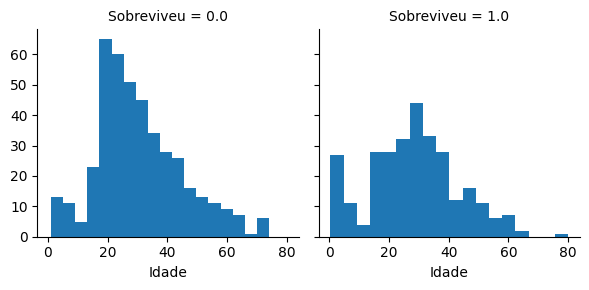

In [ ]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

- Crianças sobreviveram mais
- Passageiro mais idoso sobreviveu
- A maioria dos passageiros estão na faixa de 18-35 anos

Histograma Idade X Classe X Sobreviveu

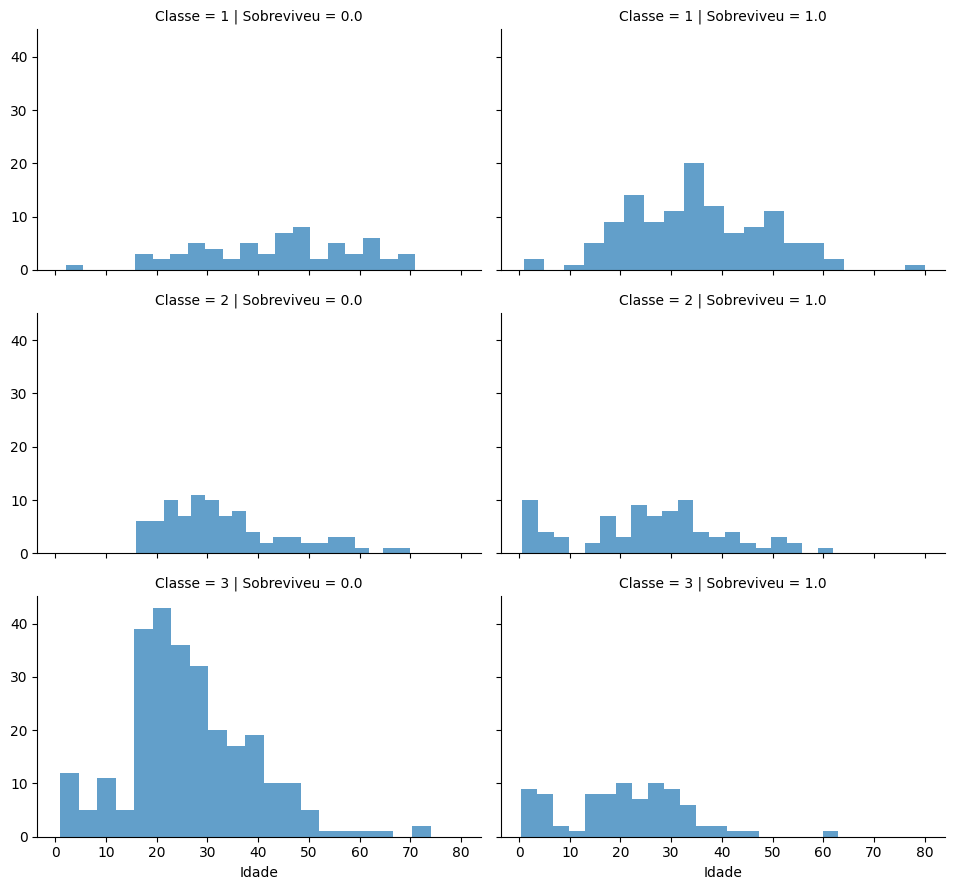

In [ ]:
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', aspect=1.6)
grid.map(plt.hist, 'Idade', alpha = 0.7, bins = 20)
grid.add_legend();

Chance de sobrevivência por porto de embarque

Embarque X Classe X Sobreviveu


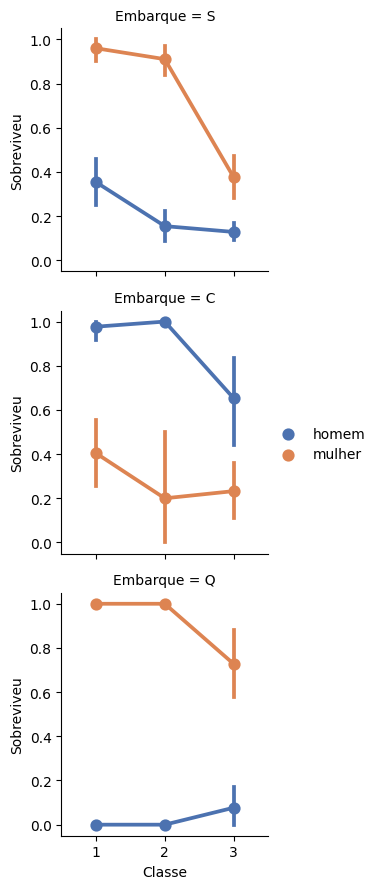

In [ ]:
grid =sns.FacetGrid(data, row='Embarque')
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

Agrupar mulheres por sobrevivência

In [ ]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


Agrupar homens por sobrevivência

In [ ]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


Gráficos de Barras Sexo X Tarifa X Embarque X Sobreviveu

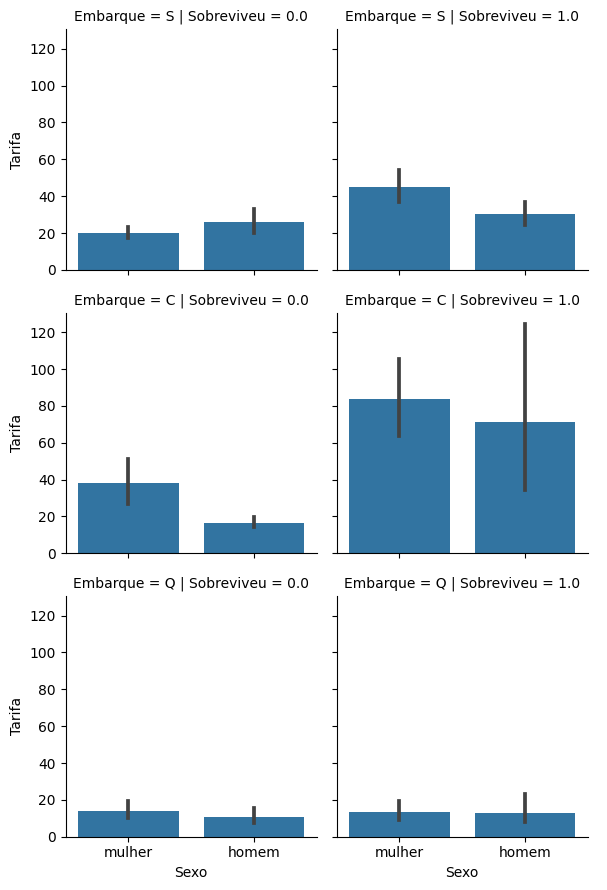

In [ ]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
grid.map(sns.barplot, 'Sexo', 'Tarifa')
grid.add_legend()

**CrossTab de sobrevivência por classe**


*O crosstab é uma tabela de contingência, na qual é uma forma de resumir a relação entre duas ou mais variáveis categóricas, mostrando a frequência com que diferentes combinações dessas variáveis ocorrem*.

In [ ]:
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


- Podemos ver que a primeira classe sobreviveu muito mais que as demais, mesmo tendo menos pessoas alocadas.
- E a terceira classe é responsável por mais pessoas mortas.

***Visualizando dados faltando ***

<Axes: ylabel='PassengerId'>

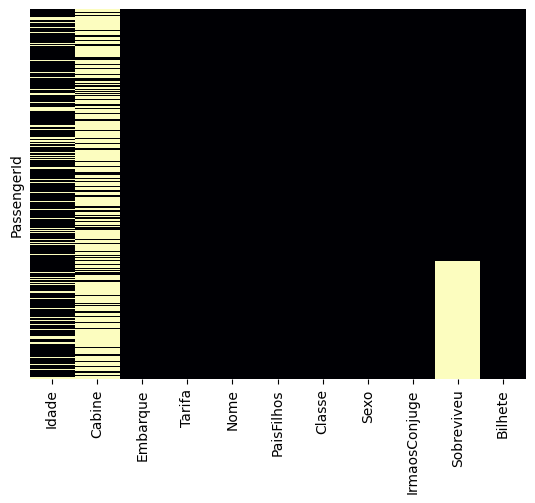

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='magma')

Percebe-se que há vários dados faltando na cabine, por isso, vamos removê-la

In [ ]:
data.drop(['Cabine'],axis=1, inplace=True)

Boxplot de classe por sexo

<Axes: xlabel='Classe', ylabel='Idade'>

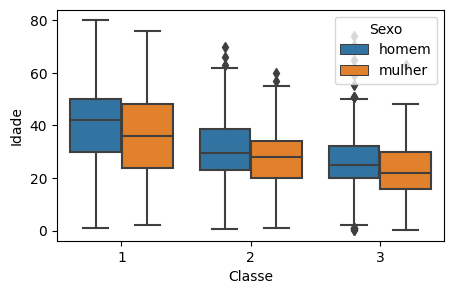

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue = 'Sexo', data=data)

**Fase da engenharia de recursos**

In [ ]:
# Extrair titulo do nome
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [ ]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


De todos esses títulos, transformamos os que têm mais repetições

In [ ]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [ ]:
pd.crosstab(data['Titulo'], data ['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


Traduzindo titulos

In [ ]:
data.loc[data['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmaosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

In [ ]:
traducao_titulos = {
    'Master' : 'Menino',
    'Miss' : 'Solteira',
    'Mr' : 'HomemAdulto',
    'Mrs' : 'Casada',
    'Outros' : 'Outros'
}

In [ ]:
data['Titulo'] = data['Titulo'].map(traducao_titulos)

**Mulheres e crianaças sobreviveram ou morreram juntos?**


Extrair sobrenomes para identificar

In [ ]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

In [ ]:
#Verificando as maiores familias
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

Analisando a sobrevivencia de mulheres e crianças da família andersson:

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
1106,NaN,Solteira,Andersson,347091


*Filtrando apenas o menino já que a mulher pode ser criança ou adulta*




Analisando a sobrevivencia de mulheres e crianças da família Sage:

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


Analisando a sobrevivencia de mulheres e crianças da família Brown:

In [ ]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


Criando DataFrame "MulherOuCrianca'

In [ ]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')]
MulherOuCrianca

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599,Casada,Cumings
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282,Solteira,Heikkinen
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803,Casada,Futrelle
9,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,mulher,0,1.0,347742,Casada,Johnson
10,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,mulher,1,1.0,237736,Casada,Nasser
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,S,13.7750,"Peacock, Miss. Treasteall",1,3,mulher,1,NaN,SOTON/O.Q. 3101315,Solteira,Peacock
1302,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,mulher,0,NaN,365237,Solteira,Naughton
1303,37.0,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,mulher,1,NaN,19928,Casada,Minahan


In [ ]:
MulherOuCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Outros'], dtype=object)

Criando feature "TamanhoGrupo"

In [ ]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']== x]['Sobreviveu'].count() )

Para cada nome, gera-se uma quantidade e a retorna




Sobrevivencia da família Andersson

In [ ]:
data[['TamanhoGrupo','Sobrenome','Titulo']].sort_values(by='TamanhoGrupo',ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo
PassengerId,,,
542,6,Andersson,Solteira
14,6,Andersson,HomemAdulto
814,6,Andersson,Solteira
543,6,Andersson,Solteira
1212,6,Andersson,HomemAdulto
851,6,Andersson,Menino
120,6,Andersson,Solteira
69,6,Andersson,Solteira
1106,6,Andersson,Solteira


Setando o index do homem adulto para 0

In [ ]:
for idx, _ in data.iterrows():
  if data['Titulo'].at[idx] == 'HomemAdulto':
    data['TamanhoGrupo'].at[idx] = 0

Criando a feature "SobrevivenciaGrupo" entre mulheres e crianças

In [ ]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome'] == 'Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')].mean()['Sobreviveu']

0.16666666666666666

In [ ]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome'] == x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='menino')].mean()['Sobreviveu'])

In [ ]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


Aqui podemos ver que os homens adultos estão recebendo o valor 1.0, o que não pode acontecer, por isso atribuimos 0 para os homens:

In [ ]:
for idx, _ in data.iterrows():
  if data['Titulo'].at[idx] == 'HomemAdulto':
    data['SobrevivenciaGrupo'].at[idx] = 0

In [ ]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


ajustado, homem = 0, mulher/menino = 1

In [ ]:
#Definindo os dados nulos como 0
data['SobrevivenciaGrupo'].isnull().sum()

139

In [ ]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [ ]:
data['SobrevivenciaGrupo'].isnull().sum()

0

Grupo de mulheres e crianças onde todos morreram juntos

In [ ]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo'] == 0) \
          & (data['TamanhoGrupo']>1)].loc[(data['Sexo'] == 'mulher') | (data['Titulo']=='menino')]['Sobrenome'].unique()

array(['Vander Planke', 'Palsson', 'Goodwin', 'Zabour', 'Jussila',
       'Boulos', 'Ford', 'Skoog', 'Sage', 'Strom', 'Lefebre', 'Allison',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

Quantitade de pessoas que morreram

In [ ]:
data[['Sobrenome', 'Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo'] == 0) \
          & (data['TamanhoGrupo']>1)].loc[(data['Sexo'] == 'mulher') | (data['Titulo']=='menino')]['Sobreviveu'].count()

35

Grupos de mulheres e crianças onde todos sobreviveram

In [ ]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo'] == 1) \
          & (data['TamanhoGrupo']>1)].loc[(data['Sexo'] == 'mulher') | (data['Titulo']=='menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Asplund', 'Laroche', 'Harper', 'West',
       'Fortune', 'Doling', 'Peter', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Graham', 'Mellinger', 'Kelly', 'Hays', 'Ryerson',
       'Wick', 'Hippach', 'Hart', 'Baclini', 'Quick', 'Taussig', 'Herman'],
      dtype=object)

In [ ]:
#quantidade de mulheres e crianças onde todos sobreviveram
data[['Sobrenome', 'Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo'] == 1) \
          & (data['TamanhoGrupo']>1)].loc[(data['Sexo'] == 'mulher') | (data['Titulo']=='menino')]['Sobreviveu'].count()

54

Criando recurso de expectativa de vida:
Se uma pessoa faz parte de um grupo onde a grande maioria morreu, a expectativa é que ela tenha morrido.
Se um pessoa faz parte de um grupo onde a grande maioria tenha sobrevivido, a expectative é que ela tenha sobrevivido.

In [ ]:
data['ExpectativaDeVida'] = ''
for idx, _ in data.iterrows():
  if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx] > 1):
    data['ExpectativaDeVida'].at[idx] = 'morrer'

  elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx] > 1):
    data['ExpectativaDeVida'].at[idx] = 'viver'

  else:
    data['ExpectativaDeVida'].at[idx] = 'desconhecida'

In [ ]:
pd.crosstab(data['ExpectativaDeVida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,504,285
morrer,43,1
viver,2,56


- de 43 pessoas que tinham expectativa de morrer apenas uma não morreu
- de 56 pessoas que tinham expectativa de sobreviver, apenas 2 morreram

Removendo colunas desnecessarias

In [ ]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [ ]:
data.drop(['Nome','Bilhete', 'Sobrenome',], axis=1, inplace=True)

**Transformando dados categóricos em VARIÁVEIS DUMMY**

In [ ]:
data = pd.get_dummies(data, columns = ['Classe',
                                       'Embarque',
                                       'Titulo',
                                       'ExpectativaDeVida',
                                       'Sexo'], drop_first=True)

In [ ]:
data.shape

(1309, 18)

In [ ]:
data.columns

Index(['Idade', 'Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'Sobreviveu',
       'TamanhoGrupo', 'SobrevivenciaGrupo', 'Classe_2', 'Classe_3',
       'Embarque_Q', 'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher'],
      dtype='object')

Preenchendo todos os valores nulos

In [ ]:
data.isnull().sum()

Idade                       263
Tarifa                        1
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
dtype: int64

In [ ]:
#Preechendo idade nula com a media
idade_media = data['Idade'].mean()
idade_media

29.881137667304014

In [ ]:
data['Idade'].fillna(idade_media, inplace=True)

In [ ]:
#Preenchenado tarifa nula com a tarifa media
tarifa_media = data['Tarifa'].mean()
tarifa_media

33.29547928134557

In [ ]:
data['Tarifa'].fillna(idade_media, inplace=True)

Criando faixa etária de sobrevivência

In [ ]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins = 5)

In [ ]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",45,55
"(16.0, 32.0]",344,181
"(32.0, 48.0]",111,75
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


Dummy da faixa etaria

In [ ]:
pd.get_dummies(data, columns=['FaixaEtaria'], drop_first=True)

,Idade,Tarifa,PaisFilhos,IrmaosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,...,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,"FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]"
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.000000,7.2500,0,1,0.0,0,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38.000000,71.2833,0,1,1.0,1,1.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,26.000000,7.9250,0,0,1.0,1,1.0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,35.000000,53.1000,0,1,1.0,1,1.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,35.000000,8.0500,0,0,0.0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,29.881138,8.0500,0,0,NaN,0,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1306,39.000000,108.9000,0,0,NaN,0,0.0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1307,38.500000,7.2500,0,0,NaN,0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Criando recurso 'Familiares'
- Baseado em IrmaosConjuges e PaisFilhos

In [ ]:
data['Familiares'] = data['IrmaosConjuge'] + data['PaisFilhos']

<Axes: >

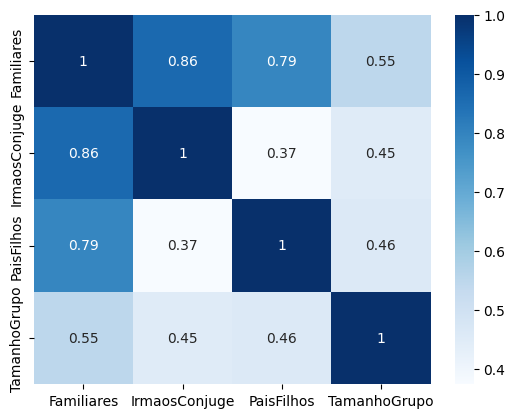

In [ ]:
#Verificando correlaçoes entre os familiares
sns.heatmap(data[['Familiares','IrmaosConjuge','PaisFilhos','TamanhoGrupo']].corr(), annot=True, cmap='Blues')